## What are the most demanded skills for the top 3 most popular data roles?

Methodology:

1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [15]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [16]:
df_US = df[df['job_country'] == 'United States'].copy()

In [17]:
df_skills = df_US.explode('job_skills')

df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [18]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [19]:
type(df_skills_count)

pandas.core.series.Series

In [20]:
df_skills_count = df_skills_count.to_frame(name = 'skill_count').reset_index()

df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,38
1,airflow,Cloud Engineer,27
2,airflow,Data Analyst,387
3,airflow,Data Engineer,4716
4,airflow,Data Scientist,1166
...,...,...,...
1865,zoom,Machine Learning Engineer,5
1866,zoom,Senior Data Analyst,50
1867,zoom,Senior Data Engineer,30
1868,zoom,Senior Data Scientist,25


In [22]:
df_skills_count.sort_values('skill_count', ascending = False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [42]:
# getting top 3 jobs

job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

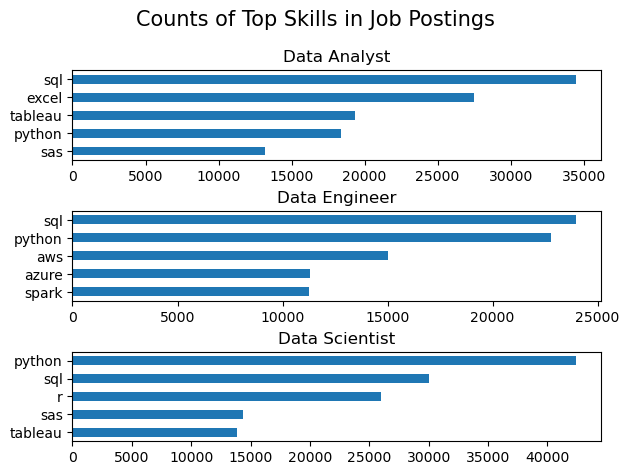

In [54]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, jobtitle in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == jobtitle].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title = jobtitle)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout(h_pad=0.5)
plt.show()

In [62]:
# total jobs for each job role

df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [66]:
df_skills_perc = pd.merge(left=df_skills_count, right=df_job_title_count, how='left', on='job_title_short')
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,vue.js,Business Analyst,1,7382
1866,arch,Business Analyst,1,7382
1867,asana,Machine Learning Engineer,1,921
1868,no-sql,Machine Learning Engineer,1,921


In [68]:
df_skills_perc['skill_perc'] = 100* df_skills_perc['skill_count'] / df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


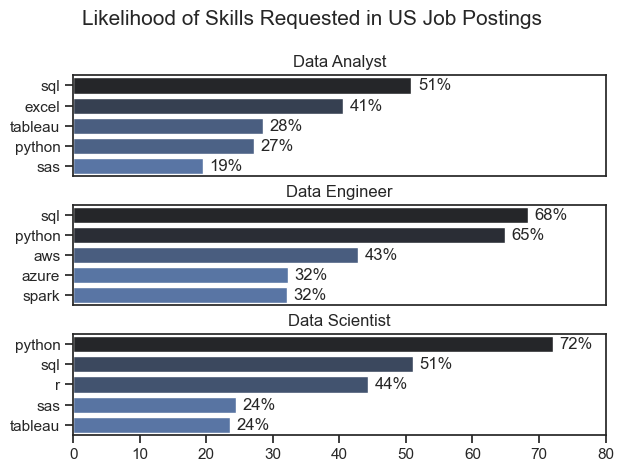

In [ ]:
import seaborn as sns

sns.set_theme(style='ticks')

fig, ax = plt.subplots(len(job_titles), 1)

for i, jobtitle in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == jobtitle].head(5)

    # df_plot.plot(kind='barh', x='job_skills', y='skill_perc', ax=ax[i], title = jobtitle) # matplotlib method

    sns.barplot(data=df_plot, y='job_skills', x='skill_perc', ax=ax[i], hue='skill_perc', palette='dark:b_r')

    ax[i].set_title(jobtitle)
    # ax[i].invert_yaxis()    # seaborn doesn't plot backwards
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,80)

    for n, val in enumerate(df_plot['skill_perc']):
        ax[i].text(val+1, n, f'{val:.0f}%', va='center')  # position, index, value to plot

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])    # remove the tickmarks for the first 2 plots

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize = 15)
fig.tight_layout(h_pad=0.5)   # fix the overlap
plt.show()

In [83]:
for i in df_plot['skill_perc']:
    print(i)

72.03637599864015
51.052184259731426
44.232534421213664
24.375318714941358
23.557708652048273
